In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
state_list=['state_1_1','state_2_1','state_2_2','state_3_1','state_3_2','state_4_1','state_4_2']
inptype_list=['wl','fl','flwl']

# Figure 2: Rainfall data

In [3]:
train_raindata = np.load('./PPO/training_raindata.npy').tolist()
test_raindata = np.load('./PPO/test_raindata.npy').tolist()

In [27]:
tem=[]
for it in range(480):
    if it >= 60 and it < 180:
        tem.append(np.float(train_raindata[0][it-60][1]))
    else:
        tem.append(None)

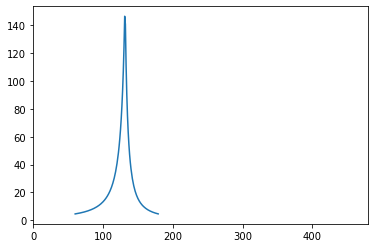

In [30]:
plt.xlim(0,480)
plt.plot([i for i in range(480)],tem)

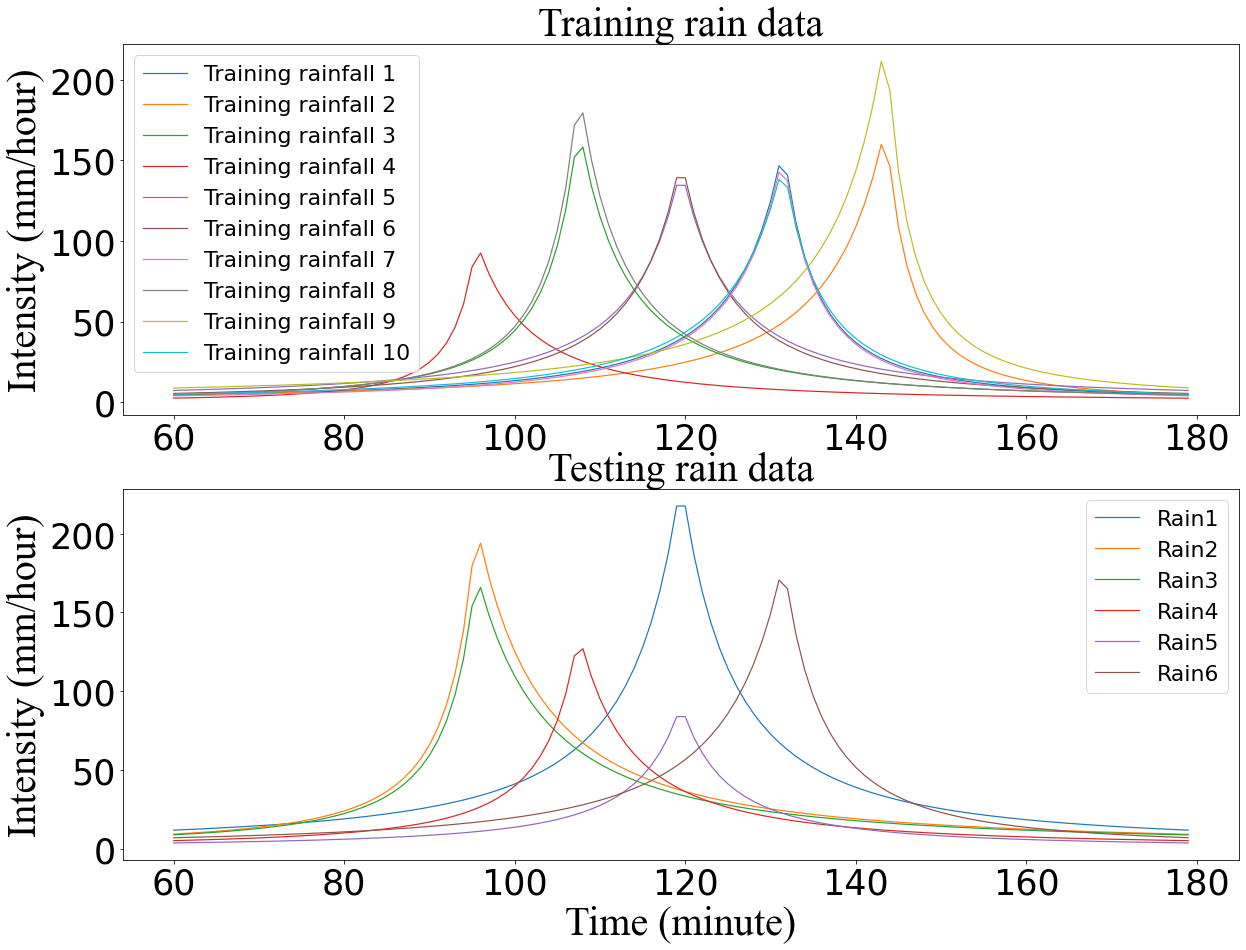

In [44]:
figs,axes=plt.subplots(2,1,figsize=(20,15))
font1={'family':'Times New Roman',
           'size':18}
font2={'family':'Times New Roman',
           'size':40}

x=np.arange(len(train_raindata[0]))

for s in range(2):
    if s ==0:
        axes[s].set_title('Training rain data',font=font2)
        for i in range(10):
            tem=[]
            for it in range(480):
                if it >= 60 and it < 180:
                    tem.append(np.float(train_raindata[i][it-60][1]))
                else:
                    tem.append(None)
            axes[s].plot(tem,label='Training rainfall '+str(i+1),linewidth=1.2)
    else:
        axes[s].set_title('Testing rain data',font=font2)
        for i in range(6):
            tem=[]
            for it in range(480):
                if it >= 60 and it < 180:
                    tem.append(np.float(test_raindata[i][it-60][1]))
                else:
                    tem.append(None)
            axes[s].plot(tem,label='Rain'+str(i+1),linewidth=1.2)
        axes[s].set_xlabel('Time (minute)',font=font2)
    
    #axes[s].set_xlim(0,480)
    axes[s].legend(fontsize=22)
    axes[s].tick_params(labelsize=35)#set_xticks(prop=font2)
    axes[s].set_ylabel('Intensity (mm/hour)',font=font2)
    

figs.savefig('./Fig2.tif',dpi=100)

# Figure 3: Training Process

### 按照state list画图，一共7行，每行里面3张

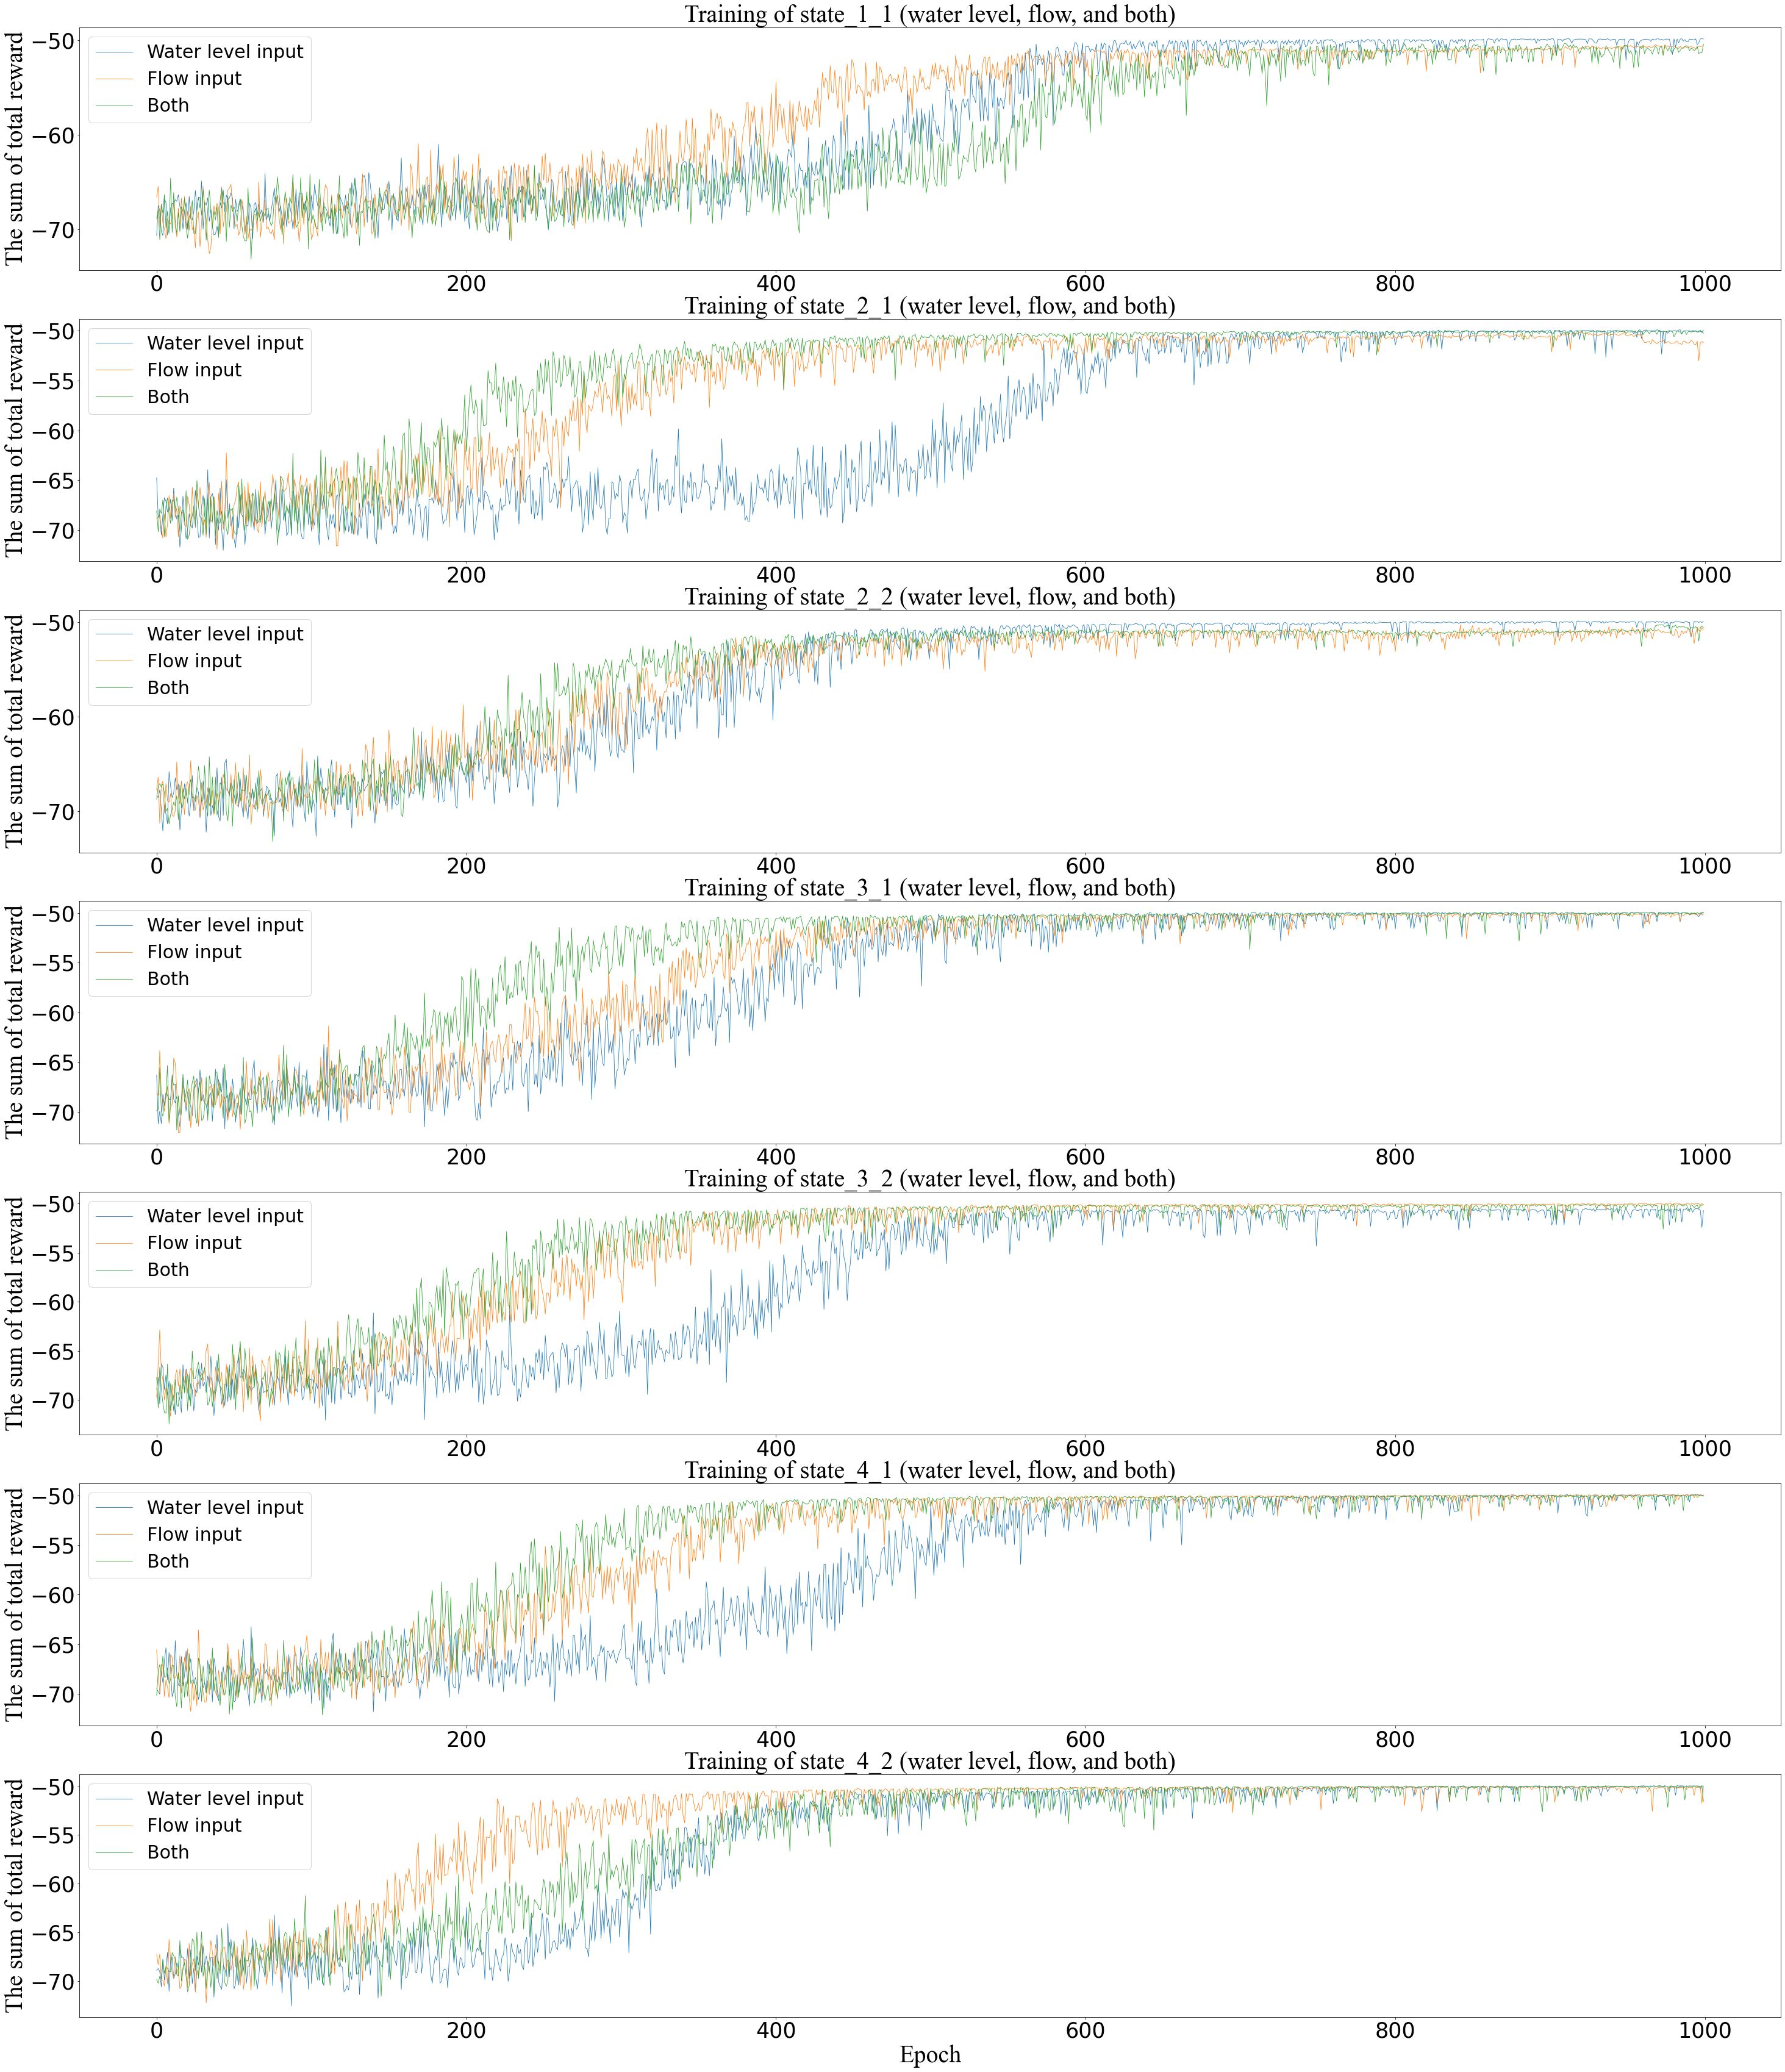

In [44]:
figs,axes=plt.subplots(7,1,figsize=(50,60))

font1={'family':'Times New Roman',
           'size':18}
font2={'family':'Times New Roman',
           'size':40}

for s in range(len(state_list)):
    datafl=np.load('./PPO/Results/fl/'+state_list[s]+'/Train.npy',allow_pickle=True).tolist()
    datawl=np.load('./PPO/Results/wl/'+state_list[s]+'/Train.npy',allow_pickle=True).tolist()
    dataflwl=np.load('./PPO/Results/flwl/'+state_list[s]+'/Train.npy',allow_pickle=True).tolist()
    
    axes[s].set_title('Training of '+state_list[s]+' (water level, flow, and both)',font=font2)
    axes[s].plot(np.array(datawl['Episode_reward']),label='Water level input',linewidth=0.8)
    axes[s].plot(np.array(datafl['Episode_reward']),label='Flow input',linewidth=0.8)
    axes[s].plot(np.array(dataflwl['Episode_reward']),label='Both',linewidth=0.8)
    axes[s].legend(fontsize=30)
    if s==len(state_list)-1:
        axes[s].set_xlabel('Epoch',font=font2)
    axes[s].set_ylabel('The sum of total reward',font=font2)
    axes[s].tick_params(labelsize=35)#set_xticks(prop=font2)

    
figs.savefig('./Fig3.tif',dpi=100)

# Table 4: Test

### 按照state list画图，一共7行，每行里面3张

In [ ]:
def figfc():
    raindata = np.load('./PPO/test_raindata.npy').tolist()
    figs,axes=plt.subplots(6,3,figsize=(10,60))
    #axes.flatten()
    
    font1={'family':'Times New Roman',
           'size':18}
    font2={'family':'Times New Roman',
           'size':10}
    for idx in range(6):
        rain,x,k=[],[],0
        for it in range(int(len(raindata[idx])/2)):
            if np.mod(it,5)==0:
                rain.append(0)
                x.append(k)
                k+=1
        
        
        for it in range(len(raindata[idx])):
            if np.mod(it,5)==0:
                rain.append(np.float64(raindata[idx][it][1]))
                x.append(k)
                k+=1

        #dqn=np.load('./DQN/Results/'+str(idx)+'.npy',allow_pickle=True).tolist()
        ppo=np.load('./PPO/Results/'+str(idx)+'.npy',allow_pickle=True).tolist()
        hc=np.load('./HC/Results/HC'+str(idx)+'.npy',allow_pickle=True).tolist()
        #bl=np.load('./Baseline/Results/'+str(idx)+'.npy',allow_pickle=True).tolist()
        #opt=np.load('./OPT/Results/'+str(idx)+'.npy',allow_pickle=True).tolist()
        
        top=np.max(np.array(hc['C'])/1000+np.array(hc['F'])/1000)
        if idx==0:
            axes[idx,0].plot(np.array(hc['F'])/1000,label='HC',linewidth=0.8)
            #axes[idx,0].plot(np.array(dqn['F'])/1000,label='DQN',linewidth=0.8)
            axes[idx,0].plot(np.array(ppo['F'])/1000,label='PPO',linewidth=0.8)
            #axes[idx,0].plot(np.array(opt['F'])/1000,label='OPT',linewidth=0.8)
            axes[idx,0].set_ylim(0,top*1.5)
            axes[idx,0].set_xticks([])
            axes[idx,0].set_title('Rain'+str(idx)+' flooding',font=font2)
            axes[idx,0].legend(loc='upper right',fontsize=6)
            ax2=axes[idx,0].twinx()
            ax2.set_yticks([])
            ax2.invert_yaxis()
            ax2.bar(x,rain,width=0.5)
            
            axes[idx,1].plot(np.array(hc['C'])/1000,label='HC',linewidth=0.8)
            #axes[idx,1].plot(np.array(dqn['C'])/1000,label='DQN',linewidth=0.8)
            axes[idx,1].plot(np.array(ppo['C'])/1000,label='PPO',linewidth=0.8)
            #axes[idx,1].plot(np.array(opt['C'])/1000,label='OPT',linewidth=0.8)
            axes[idx,1].set_ylim(0,top*1.5)
            axes[idx,1].set_xticks([])
            axes[idx,1].set_yticks([])
            axes[idx,1].set_title('Rain'+str(idx)+' CSO',font=font2)
            axes[idx,1].legend(loc='upper right',fontsize=6)
            ax2=axes[idx,1].twinx()
            ax2.set_yticks([])
            ax2.invert_yaxis()
            ax2.bar(x,rain,width=0.5)
            
            axes[idx,2].plot(np.array(hc['C'])/1000+np.array(hc['F'])/1000,label='HC',linewidth=0.8)
            #axes[idx,2].plot(np.array(dqn['C'])/1000+np.array(dqn['F'])/1000,label='DQN',linewidth=0.8)
            axes[idx,2].plot(np.array(ppo['C'])/1000+np.array(ppo['F'])/1000,label='PPO',linewidth=0.8)
            #axes[idx,2].plot(np.array(opt['C'])/1000+np.array(opt['F'])/1000,label='OPT',linewidth=0.8)
            axes[idx,2].set_ylim(0,top*1.5)
            axes[idx,2].set_xticks([])
            axes[idx,2].set_yticks([])
            axes[idx,2].set_title('Rain'+str(idx)+' floodin+CSO',font=font2)
            axes[idx,2].legend(loc='lower right',fontsize=6)
            ax2=axes[idx,2].twinx()
            ax2.invert_yaxis()
            ax2.bar(x,rain,width=0.5)
                
                
        elif idx==5:
            axes[idx,0].plot(np.array(hc['F'])/1000,label='HC',linewidth=0.8)
            #axes[idx,0].plot(np.array(dqn['F'])/1000,label='DQN',linewidth=0.8)
            axes[idx,0].plot(np.array(ppo['F'])/1000,label='PPO',linewidth=0.8)
            #axes[idx,0].plot(np.array(opt['F'])/1000,label='OPT',linewidth=0.8)
            axes[idx,0].set_ylim(0,top*1.5)
            axes[idx,0].set_xticks([0,np.array(ppo['F']).shape[0]],['0','480'])
            axes[idx,0].set_title('Rain'+str(idx)+' flooding',font=font2)
            axes[idx,0].legend(loc='upper right',fontsize=6)
            ax2=axes[idx,0].twinx()
            ax2.set_yticks([])
            ax2.invert_yaxis()
            ax2.bar(x,rain,width=0.5)
            
            axes[idx,1].plot(np.array(hc['C'])/1000,label='HC',linewidth=0.8)
            #axes[idx,1].plot(np.array(dqn['C'])/1000,label='DQN',linewidth=0.8)
            axes[idx,1].plot(np.array(ppo['C'])/1000,label='PPO',linewidth=0.8)
            #axes[idx,1].plot(np.array(opt['C'])/1000,label='OPT',linewidth=0.8)
            axes[idx,1].set_ylim(0,top*1.5)
            axes[idx,1].set_xticks([0,np.array(ppo['C']).shape[0]],['0','480'])
            axes[idx,1].set_title('Rain'+str(idx)+' CSO',font=font2)
            axes[idx,1].set_yticks([])
            axes[idx,1].legend(loc='upper right',fontsize=6)
            ax2=axes[idx,1].twinx()
            ax2.set_yticks([])
            ax2.invert_yaxis()
            ax2.bar(x,rain,width=0.5)
            
            axes[idx,2].plot(np.array(hc['C'])/1000+np.array(hc['F'])/1000,label='HC',linewidth=0.8)
            #axes[idx,2].plot(np.array(dqn['C'])/1000+np.array(dqn['F'])/1000,label='DQN',linewidth=0.8)
            axes[idx,2].plot(np.array(ppo['C'])/1000+np.array(ppo['F'])/1000,label='PPO',linewidth=0.8)
            #axes[idx,2].plot(np.array(opt['C'])/1000+np.array(opt['F'])/1000,label='OPT',linewidth=0.8)
            axes[idx,2].set_ylim(0,top*1.5)
            axes[idx,2].set_xticks([0,np.array(ppo['F']).shape[0]],['0','480'])
            axes[idx,2].set_title('Rain'+str(idx)+' floodin+CSO',font=font2)
            axes[idx,2].set_yticks([])
            axes[idx,2].legend(loc='lower right',fontsize=6)
            ax2=axes[idx,2].twinx()
            ax2.invert_yaxis()
            ax2.bar(x,rain,width=0.5)
            
        else:
            axes[idx,0].plot(np.array(hc['F'])/1000,label='HC',linewidth=0.8)
            #axes[idx,0].plot(np.array(dqn['F'])/1000,label='DQN',linewidth=0.8)
            axes[idx,0].plot(np.array(ppo['F'])/1000,label='PPO',linewidth=0.8)
            #axes[idx,0].plot(np.array(opt['F'])/1000,label='OPT',linewidth=0.8)
            axes[idx,0].set_title('Rain'+str(idx)+' flooding',font=font2)
            axes[idx,0].set_ylim(0,top*1.5)
            axes[idx,0].set_xticks([])
            axes[idx,0].legend(loc='upper right',fontsize=6)
            ax2=axes[idx,0].twinx()
            ax2.set_yticks([])
            ax2.invert_yaxis()
            ax2.bar(x,rain,width=0.5)
            
            axes[idx,1].plot(np.array(hc['C'])/1000,label='HC',linewidth=0.8)
            #axes[idx,1].plot(np.array(dqn['C'])/1000,label='DQN',linewidth=0.8)
            axes[idx,1].plot(np.array(ppo['C'])/1000,label='PPO',linewidth=0.8)
            #axes[idx,1].plot(np.array(opt['C'])/1000,label='OPT',linewidth=0.8)
            axes[idx,1].set_title('Rain'+str(idx)+' CSO',font=font2)
            axes[idx,1].set_ylim(0,top*1.5)
            axes[idx,1].set_xticks([])
            axes[idx,1].set_yticks([])
            axes[idx,1].legend(loc='upper right',fontsize=6)
            ax2=axes[idx,1].twinx()
            ax2.set_yticks([])
            ax2.invert_yaxis()
            ax2.bar(x,rain,width=0.5)
            
            axes[idx,2].plot(np.array(hc['C'])/1000+np.array(hc['F'])/1000,label='HC',linewidth=0.8)
            #axes[idx,2].plot(np.array(dqn['C'])/1000+np.array(dqn['F'])/1000,label='DQN',linewidth=0.8)
            axes[idx,2].plot(np.array(ppo['C'])/1000+np.array(ppo['F'])/1000,label='PPO',linewidth=0.8)
            #axes[idx,2].plot(np.array(opt['C'])/1000+np.array(opt['F'])/1000,label='OPT',linewidth=0.8)
            axes[idx,2].set_title('Rain'+str(idx)+' floodin+CSO',font=font2)
            axes[idx,2].set_ylim(0,top*1.5)
            axes[idx,2].set_xticks([])
            axes[idx,2].set_yticks([])
            axes[idx,2].legend(loc='lower right',fontsize=6)
            ax2=axes[idx,2].twinx()
            ax2.invert_yaxis()
            ax2.bar(x,rain,width=0.5)
    
    figs.text(0.06,0.34,'Volumes of Flooding and CSO (10$^{3}$ m$^{3}$)',rotation=90,font=font1)
    figs.text(0.94,0.4,'Rain intensity (mm/hour)',rotation=-90,font=font1)
    figs.text(0.43,0.06,'Time (minutes)',font=font1)
    #figs.legend(fontsize=15,ncol=4,loc = (0.3,0.01))
    
    figs.savefig('./Fig4.tif',dpi=100)

### 图太多了，用表统计

In [59]:
table=[]
PPOlist=[]
for p1 in state_list:
    for p2 in inptype_list:
        PPOlist.append(p2+'/'+p1)

for i in range(22):
    line=[]
    if i==0:
        for j in range(6):
            data=np.load('./HC/Results/HC'+str(j)+'.npy',allow_pickle=True).tolist()
            tem=np.array(data['C'])+np.array(data['F'])
            line.append(tem[-1]/1000)
    else:
        for j in range(6):
            data=np.load('./PPO/Results/'+PPOlist[i-1]+'/'+str(j)+'.npy',allow_pickle=True).tolist()
            tem=np.array(data['C'])+np.array(data['F'])
            line.append(tem[-1]/1000)
    table.append(line)


In [64]:
np.save('./FandC',table)

In [66]:
tb=pd.DataFrame(table)

In [68]:
tb.to_csv('./FandC.csv')

# Table5: Satatistic

In [24]:
data1=pd.read_csv('./Fig4a.csv').values
data2=pd.read_csv('./Fig4b.csv').values

In [29]:
data1

array([['mid', 41.17, 31.65, 27.455, 16.235, 8.82, 26.275],
       ['mid+up', 41.00833333, 31.46833333, 27.48833333, 16.22833333,
        9.01, 26.41833333],
       ['mid+down', 41.20666667, 31.82833333, 27.56833333, 16.27833333,
        9.096666667, 26.48166667],
       ['all', 40.97, 31.59333333, 27.39166667, 16.02, 8.851666667,
        26.22166667]], dtype=object)

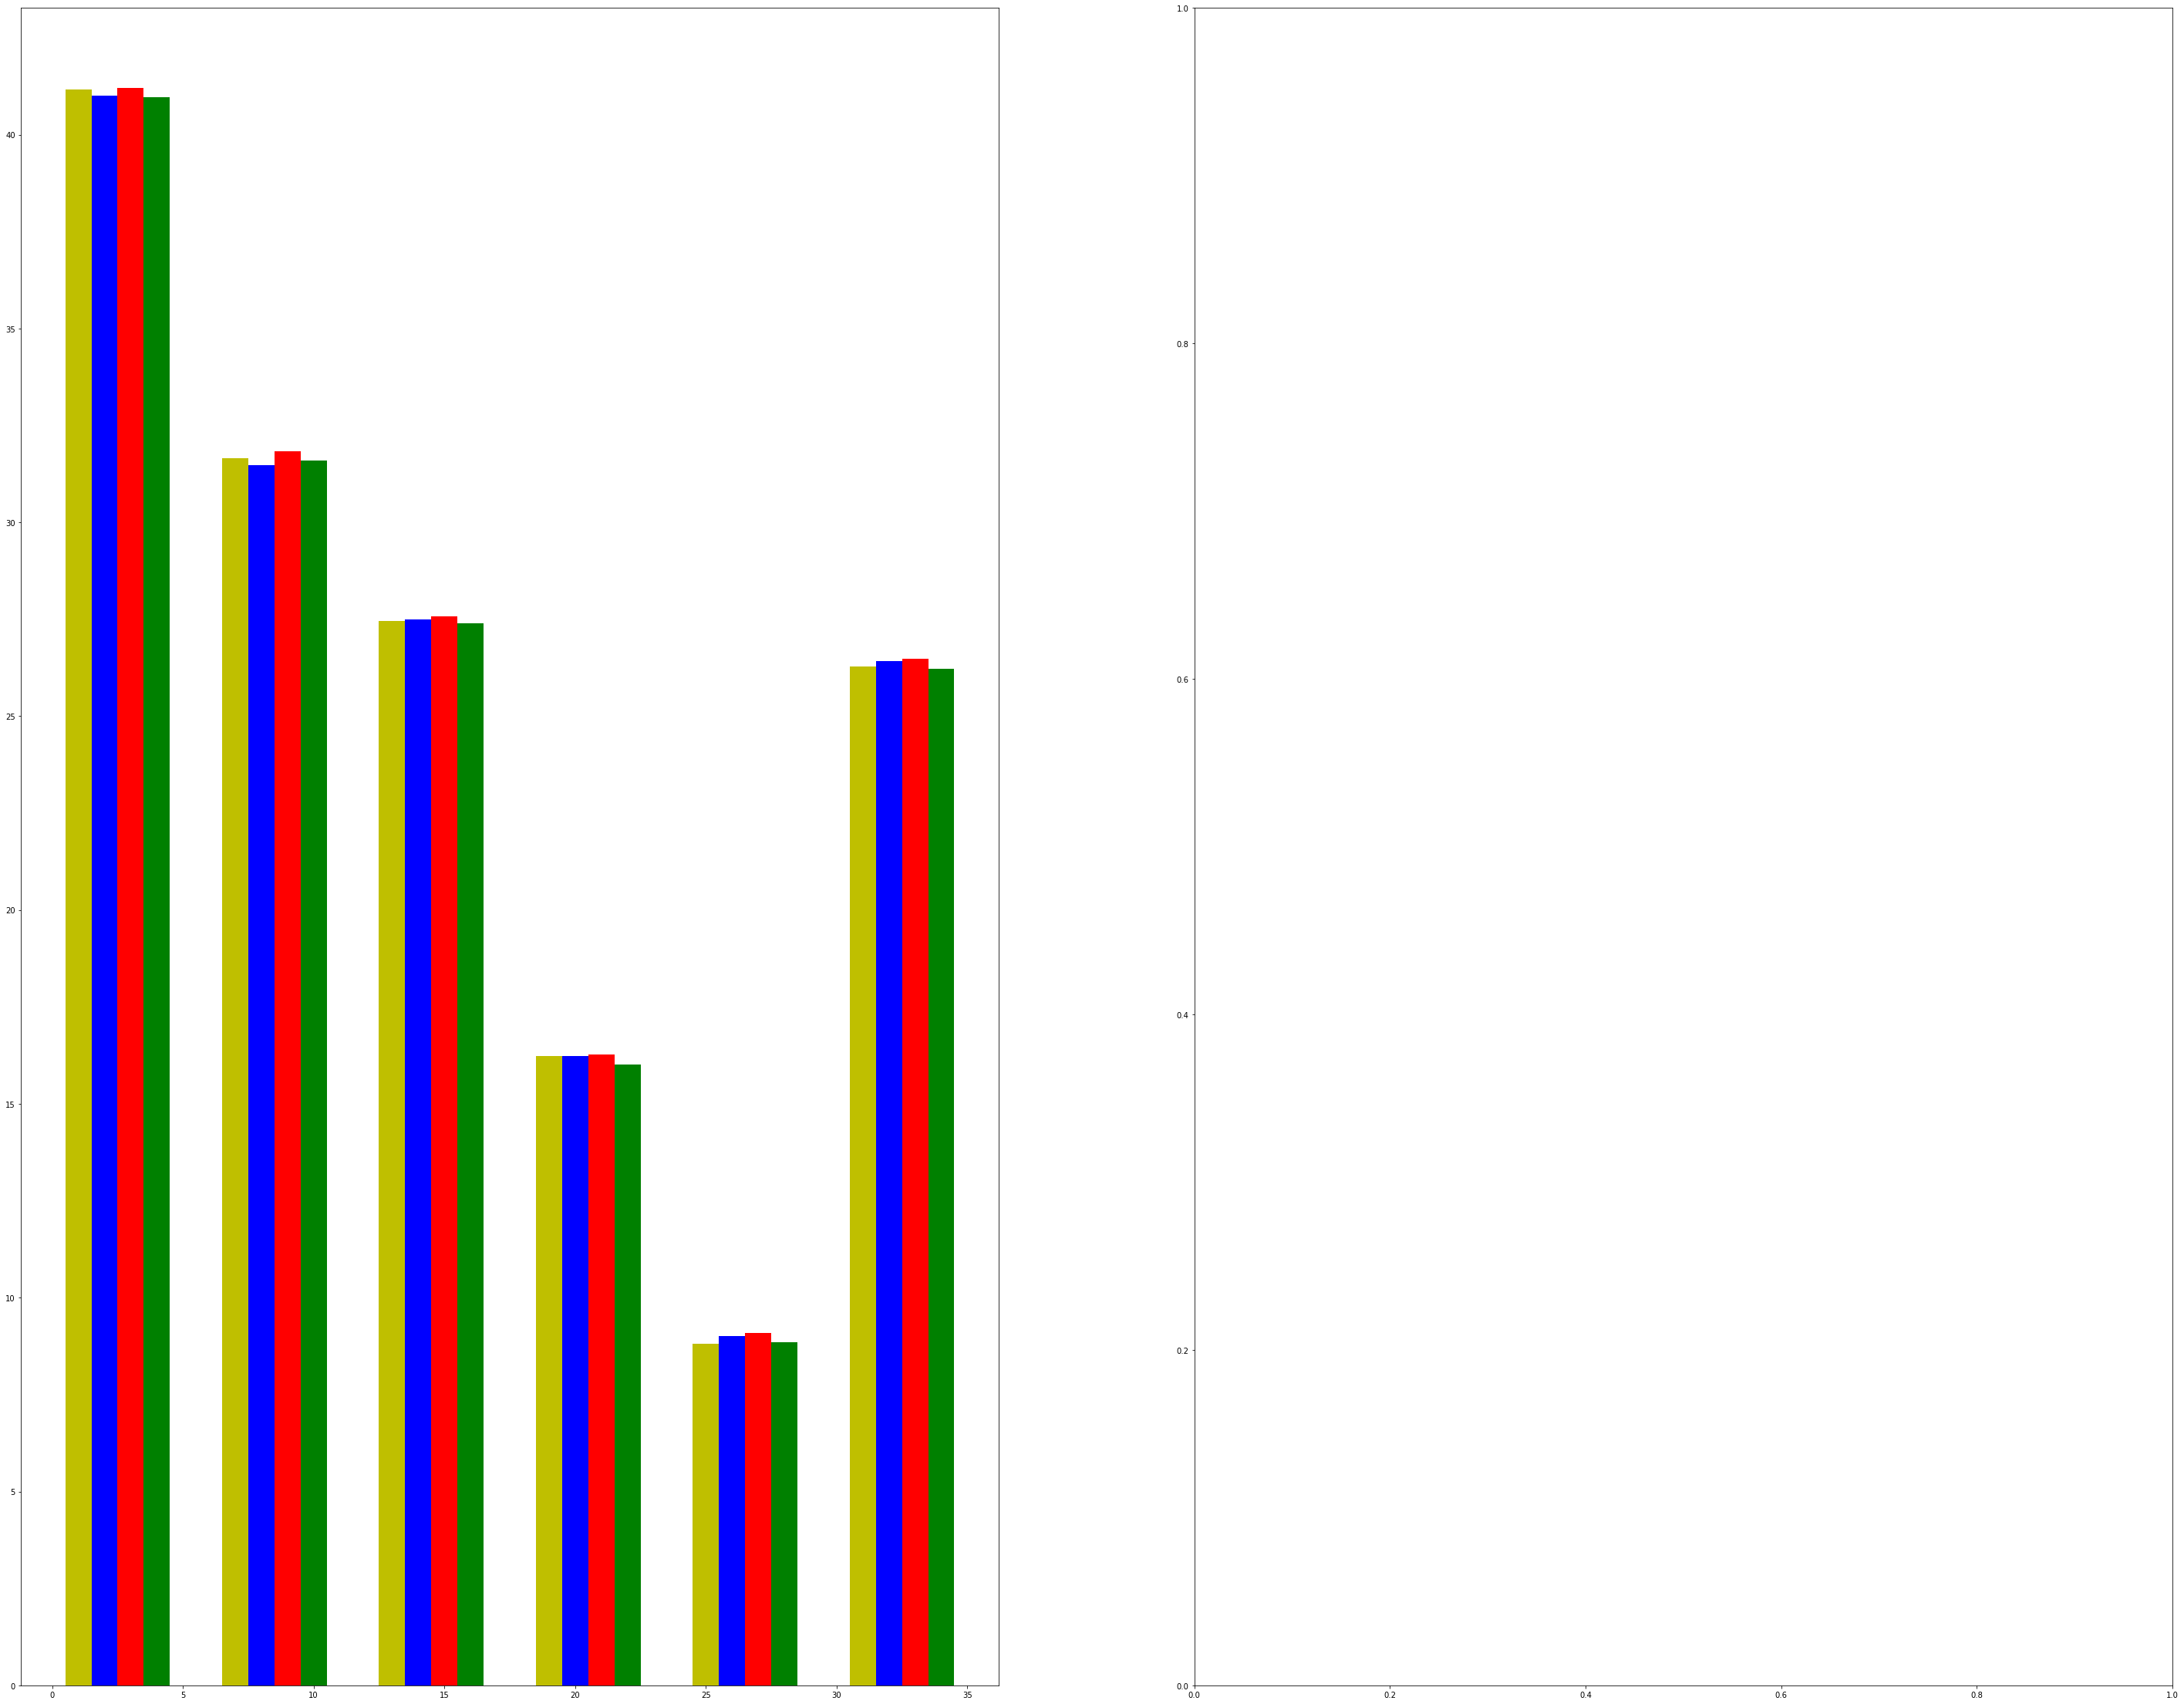

In [40]:
figs,axes=plt.subplots(1,2,figsize=(50,40))

font1={'family':'Times New Roman',
           'size':18}
font2={'family':'Times New Roman',
           'size':40}

x1=[1+i*6 for i in range(6)]
c=['y','b','r','g']
for i in range(6):
    for j in range(4):
        axes[0].bar(x1[i]+j,data1[j,1+i],1,color=c[j])
    